In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
import seaborn as sns
from sklearn.preprocessing import StandardScaler
sns.set_theme(style='darkgrid',palette='viridis')
%matplotlib inline

In [2]:
df = pd.read_excel("EastWestAirlines.xlsx", sheet_name='data')

In [3]:
df

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

In [4]:
df.describe()

ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.000000       0.000000      0.00000           0.000000   
25%       1.000000    1250.000000      3.00000           0.000000   
50%       1.000000    7171.000000     12.00000           0.000000   
75%       1.000000   23800.500000     17.00000         311.000000   
max       5.000000  263685.000000     86.00000       30817.000000   

       Flight_trans_12  Days_since_enroll       Award?  
count      3999.000000         3999.00000  3999.000000  
mean          1.373593         4118.55939     0.370343  
std           3.793172         2065.13454     0.482957  
min           0.000000            2.00000     0.000000  
25%           0.000000         2330.00000     0.000000  
50%           0.000000         4096.00000     0.000000  
75%           1.000000         5790.50000     1.000000  
max          53.000000         8296.00000     1.000000

In [5]:
df.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

<Axes: >

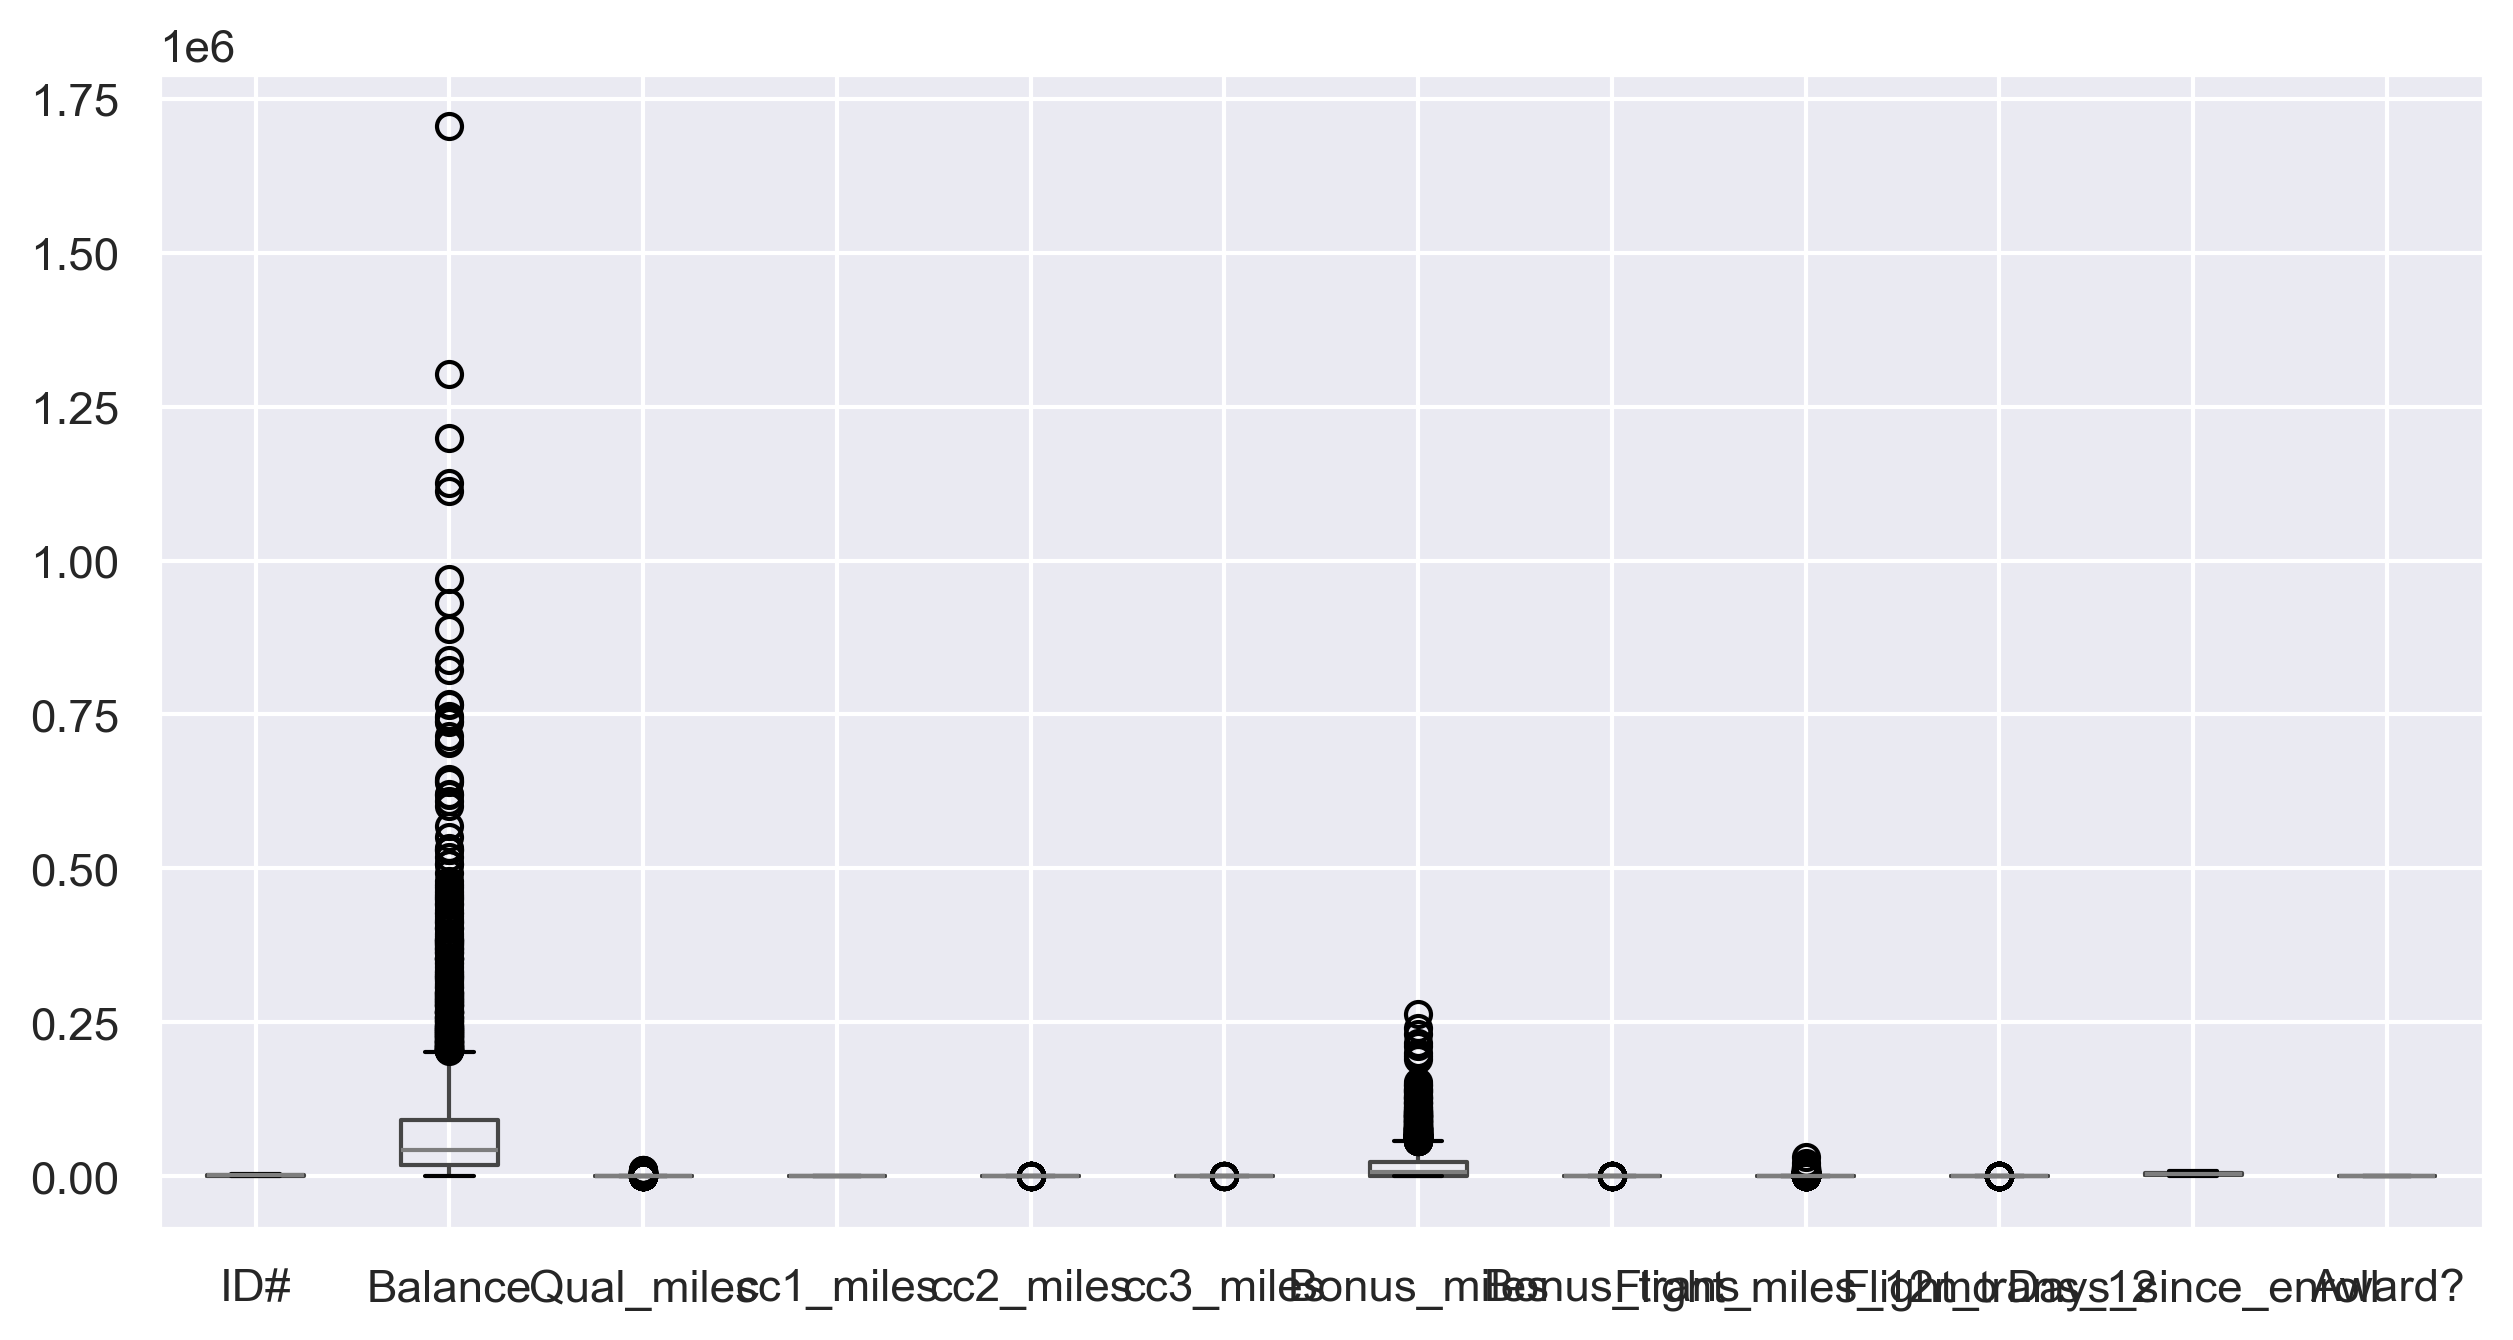

In [6]:
df.boxplot()

In [7]:
def replace_outliers_with_iqr_capping(df, column, threshold=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    
    # Replace outliers with capped values
    df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
    
    return df

# Replace outliers in column 'B' using capping method with IQR and a threshold of 1.5



In [10]:
df = replace_outliers_with_iqr_capping(df, 'Balance', threshold=1.5)
df = replace_outliers_with_iqr_capping(df, 'Qual_miles', threshold=1.5)
df = replace_outliers_with_iqr_capping(df, 'cc2_miles', threshold=1.5)
df = replace_outliers_with_iqr_capping(df, 'cc3_miles', threshold=1.5)
df = replace_outliers_with_iqr_capping(df, 'Bonus_miles', threshold=1.5)
df = replace_outliers_with_iqr_capping(df, 'Bonus_trans', threshold=1.5)
df = replace_outliers_with_iqr_capping(df, 'Flight_miles_12mo', threshold=1.5)
df = replace_outliers_with_iqr_capping(df, 'Flight_trans_12', threshold=1.5)


<Axes: >

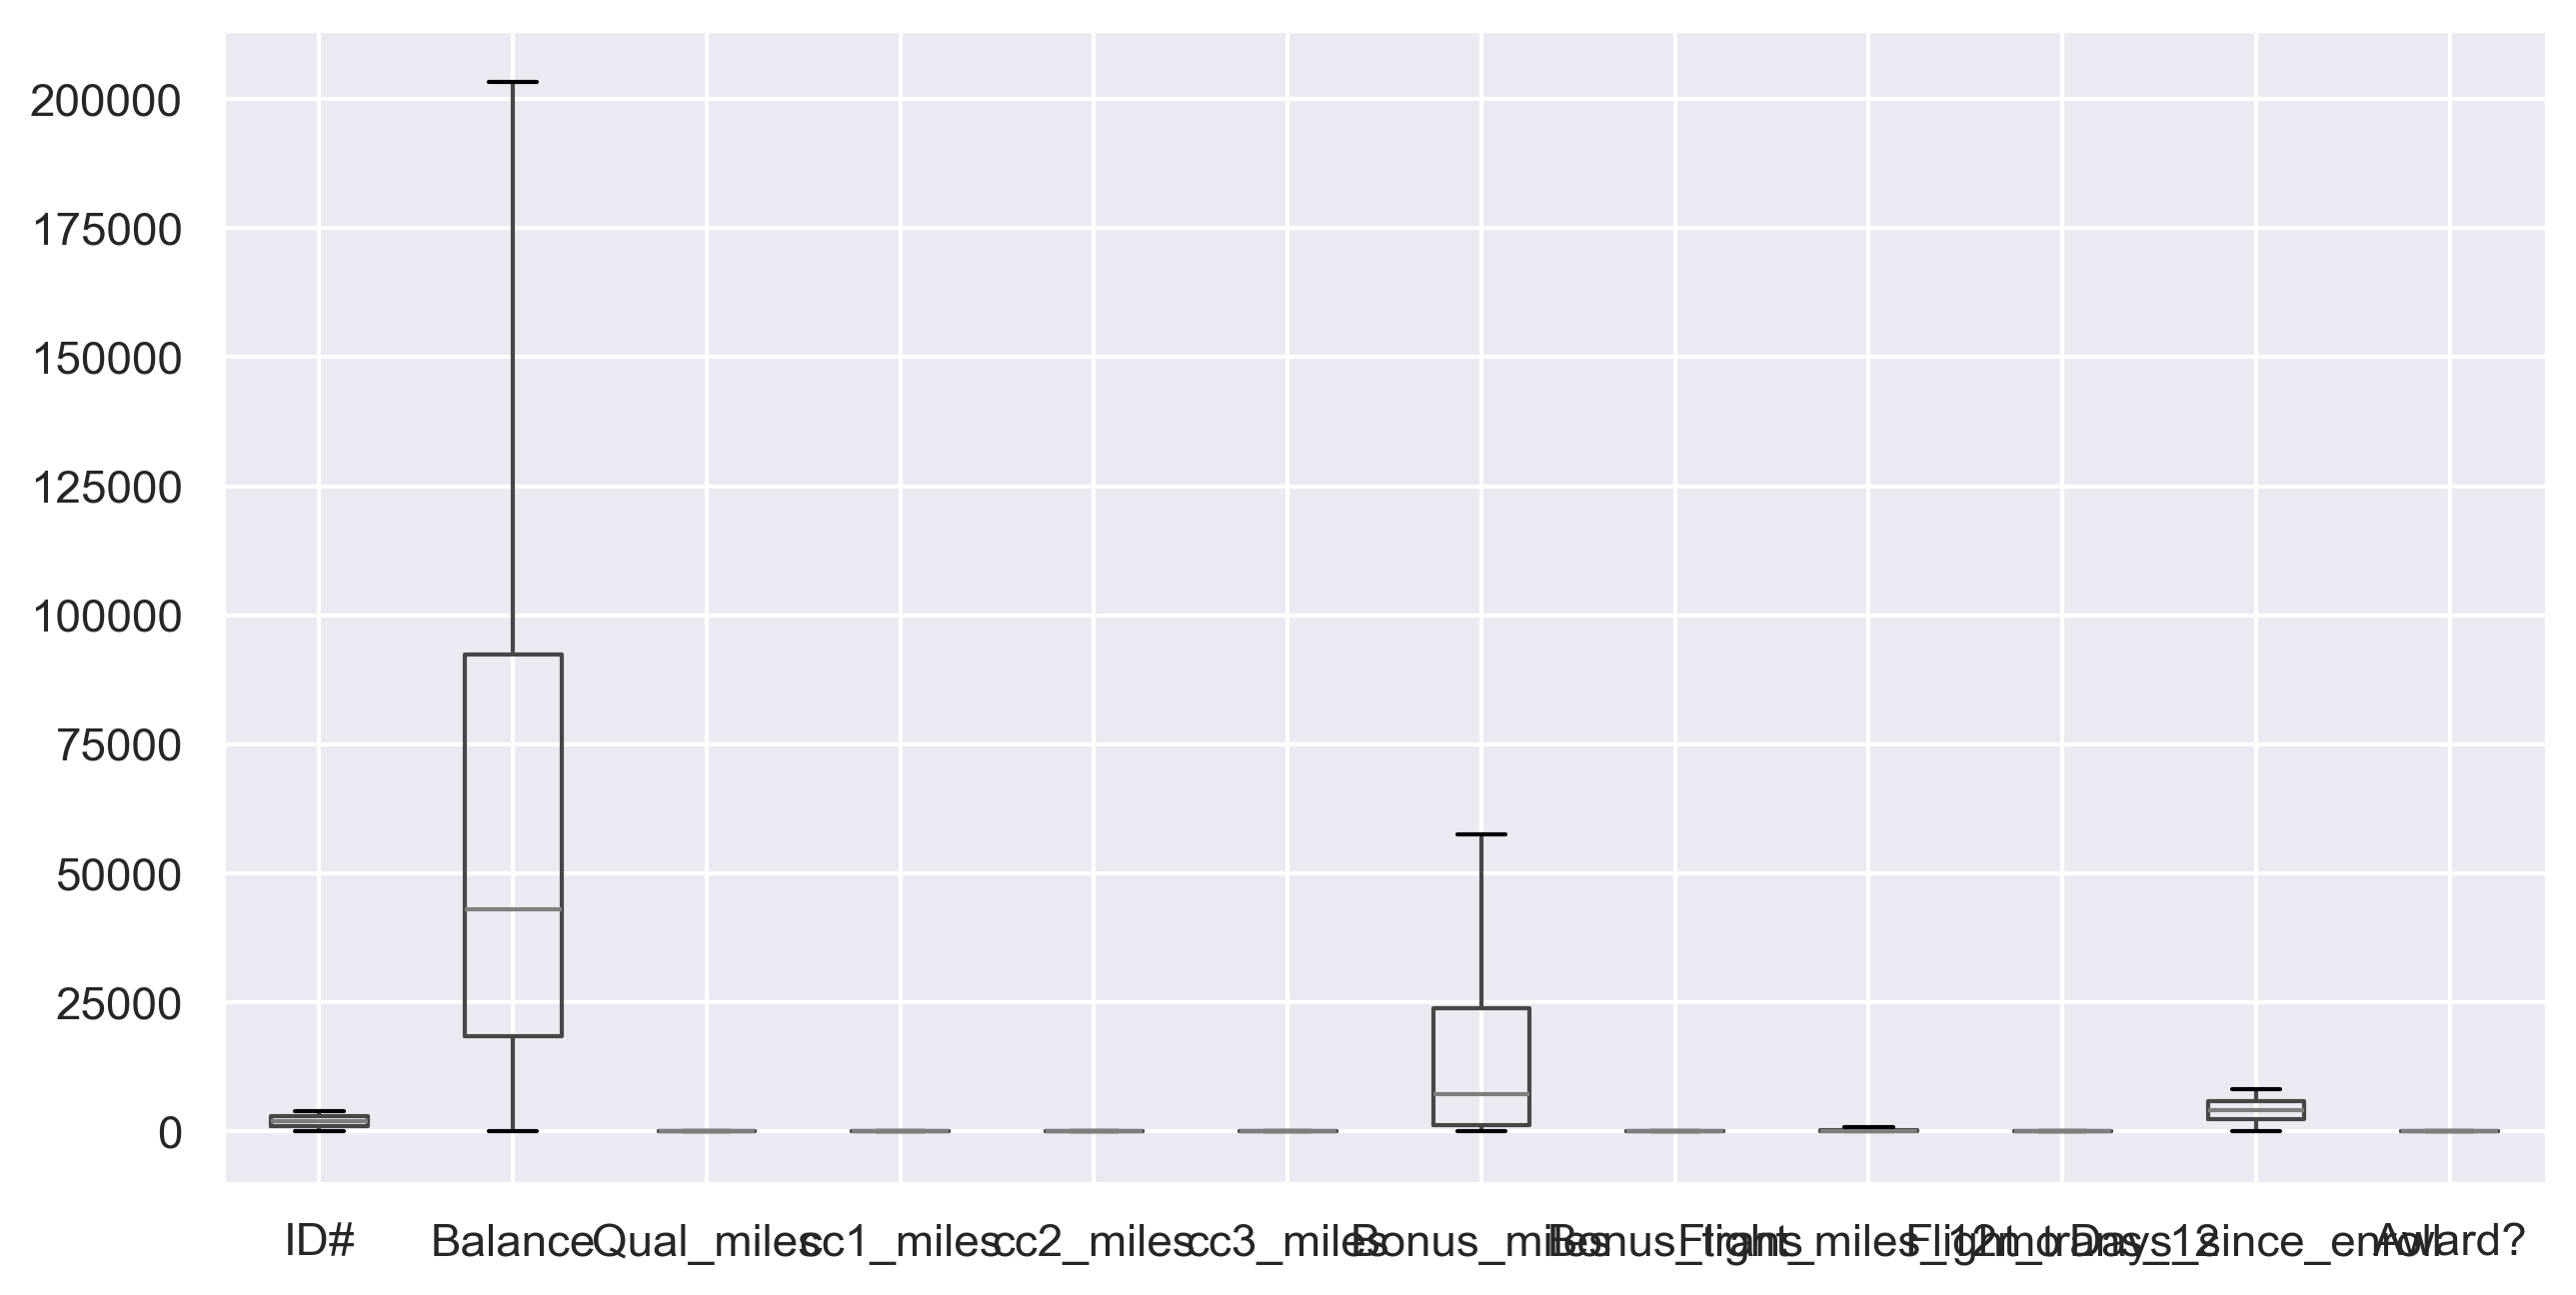

In [11]:
df.boxplot()

In [12]:
sns.pairplot(df)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

In [13]:
sc = StandardScaler()
x = sc.fit_transform(df)
x

array([[-1.73512503, -0.60725829,  0.        , ..., -0.62614341,
         1.39545434, -0.7669193 ],
       [-1.73426342, -0.75894657,  0.        , ..., -0.62614341,
         1.37995704, -0.7669193 ],
       [-1.73340181, -0.38206963,  0.        , ..., -0.62614341,
         1.41192021, -0.7669193 ],
       ...,
       [ 1.72682006,  0.1675298 ,  0.        , ..., -0.62614341,
        -1.31560393,  1.30391816],
       [ 1.72768167, -0.15118775,  0.        , ...,  0.43238439,
        -1.31608822, -0.7669193 ],
       [ 1.72854328, -1.03556163,  0.        , ..., -0.62614341,
        -1.31754109, -0.7669193 ]])

In [14]:
from sklearn.cluster import DBSCAN

In [18]:
db = DBSCAN(eps=0.5, min_samples=13)

y = db.fit_predict(x)

In [19]:
y

array([ 0,  0,  0, ..., -1, -1,  0], dtype=int64)

In [20]:
from sklearn.metrics import silhouette_score

In [21]:
silhouette_score(x,y)

-0.22869811991739386

In [22]:
from sklearn.neighbors import NearestNeighbors

In [23]:
neigh = NearestNeighbors(n_neighbors=3).fit(x)
d,i = neigh.kneighbors(x)

In [24]:
d

array([[0.        , 0.18786764, 0.21469982],
       [0.        , 0.134725  , 0.18786764],
       [0.        , 0.23361242, 0.36010907],
       ...,
       [0.        , 0.2550823 , 0.37607587],
       [0.        , 0.48487137, 0.65876427],
       [0.        , 0.03911926, 0.10499643]])

In [25]:
dist = np.sort(d[:,1])

Text(0, 0.5, 'Epsilon value')

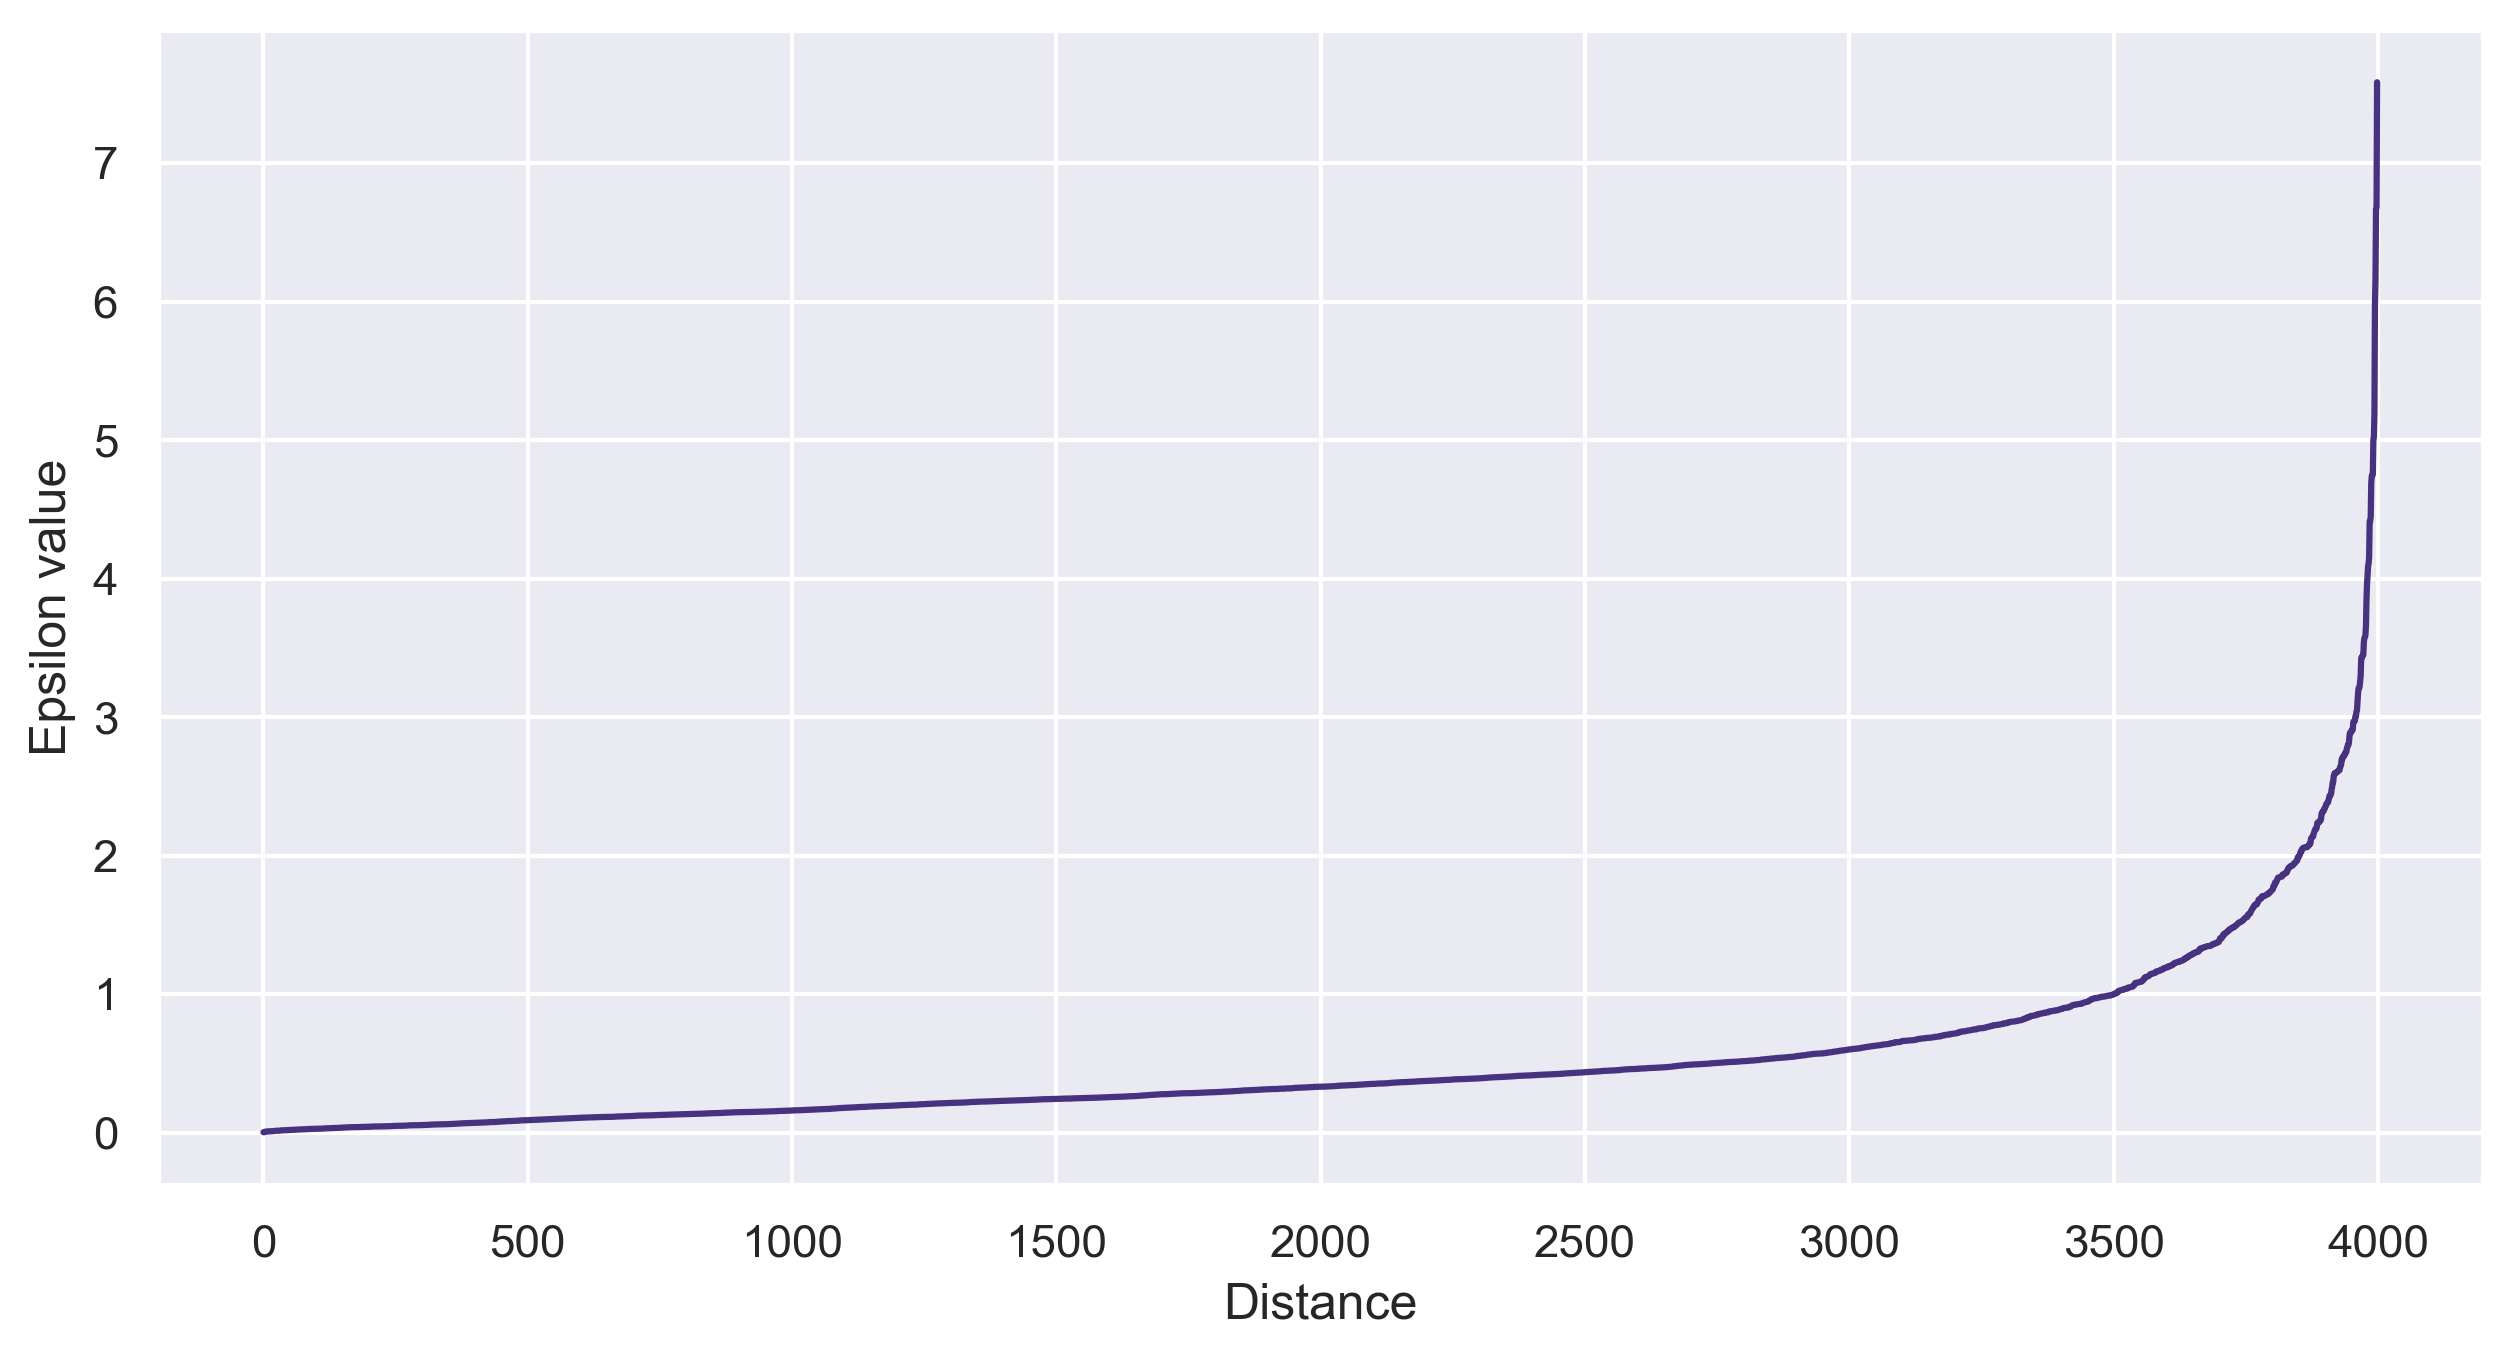

In [25]:
plt.plot(dist)
plt.xlabel('Distance')
plt.ylabel('Epsilon value')

In [28]:
db = DBSCAN(eps=2,min_samples=13)
ypred = db.fit_predict(x)
ypred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [29]:
silhouette_score(x,ypred)

0.192624538900093

In [30]:
df['cluster'] = ypred
df

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1  28143.0         0.0          1        1.0        1.0        174.0   
1        2  19244.0         0.0          1        1.0        1.0        215.0   
2        3  41354.0         0.0          1        1.0        1.0       4123.0   
3        4  14776.0         0.0          1        1.0        1.0        500.0   
4        5  97752.0         0.0          4        1.0        1.0      43300.0   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017  18476.0         0.0          1        1.0        1.0       8525.0   
3995  4018  64385.0         0.0          1        1.0        1.0        981.0   
3996  4019  73597.0         0.0          3        1.0        1.0      25447.0   
3997  4020  54899.0         0.0          1        1.0        1.0        500.0   
3998  4021   3016.0         0.0          1        1.0        1.0          0.0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0             1.0                0.0              0.0               7000   
1             2.0                0.0              0.0               6968   
2             4.0                0.0              0.0               7034   
3             1.0                0.0              0.0               6952   
4            26.0              777.5              2.5               6935   
...           ...                ...              ...                ...   
3994          4.0              200.0              1.0               1403   
3995          5.0                0.0              0.0               1395   
3996          8.0                0.0              0.0               1402   
3997          1.0              500.0              1.0               1401   
3998          0.0                0.0              0.0               1398   

      Award?  cluster  
0          0        0  
1          0        0  
2          0        0  
3          0        0  
4          1        1  
...      ...      ...  
3994       1        1  
3995       1        1  
3996       1        1  
3997       0        0  
3998       0        0  

[3999 rows x 13 columns]

In [31]:
df['cluster'].value_counts()

cluster
 0    2515
 1    1479
-1       5
Name: count, dtype: int64